In [45]:
#source EPOTFenv/bin/activate (launching and exiting the virtual environment containing the required modules, stored in the working directory for VNA_Analysis)
#EPOTFenv/bin/python your_script.py - for running a script in the virtual environment
#source deactivate

#import all the libraries needed
from import_dep import *

# import my functions stored in the file 'functions' which can then be called with functions.function_name()
import functions

# Define the path to the output directory where data is saved
path_out =  ('/Users/horatiocox/Desktop/RUG Postdoc/Experiments/Electrical/VDP_JT029_SrRuO3/Output/')
# Define the path to the directories containing the experimental data
directory_1 = Path('/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/Data/')

plot_data = False


## Import Measurement Data 

In [24]:
data_import_np, data_import_df = functions.import_ppms_data(directory_1.joinpath('JT029_SrRuO3_171024_Combined_fullrange.txt'))
print('np shape:', data_import_np.shape)
print(data_import_df.head())
# Note that field has been converted to Tesla

np shape: (850, 5, 6)
   Temp (K)  Field (T)  Source (A)  Source (V)  Sense (V)  index
0    4.9985   -0.00002    -0.00001     -0.0118  -0.000010      0
1    4.9985   -0.00002    -0.00001     -0.0118   0.000112      1
2    4.9985   -0.00002    -0.00001     -0.0118  -0.000673      2
3    4.9985   -0.00002    -0.00001     -0.0118  -0.000667      3
4    4.9985   -0.00002    -0.00001     -0.0118  -0.000541      4


## Extract and Check Temperature, Field, and Current values

In [25]:
# Extract the current, temperature and field values from the data as lists along with the number of values used for each
#ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]

#if re-ordering is true then we reassign data_np
[ctf, tf_av, data_np, data_df] = functions.extract_ctf(data_import_np, reorder = True)

# Check you have the expected and correct Temperature, Field and Current values!
#ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]
print(ctf[3],'Currents (uA):',ctf[0]/1e-6)  
print(ctf[4],'Temperatures (K):',ctf[1])
print(ctf[5],'Fields (kOe):',np.round(ctf[2]/1000,decimals=0))
print('Is this correct?')

print(data_df.head())


(850, 5, 6)
5 Currents (uA): [-10.  -5.   0.   5.  10.]
17 Temperatures (K): [  5.  25.  45.  65.  85. 105. 125. 145. 165. 185. 205. 225. 245. 265.
 285. 305. 325.]
10 Fields (kOe): [-0. -0. -0. -0. -0. -0.  0.  0.  0.  0.]
Is this correct?
   Temp (K)  Field (T)  Source (A)  Source (V)  Sense (V)
0    5.0031  -7.999964   -0.000010    -0.01165  -0.000664
1    5.0031  -7.999964   -0.000005    -0.00582  -0.000334
2    5.0031  -7.999964    0.000000    -0.00001  -0.000005
3    5.0031  -7.999964    0.000005     0.00582   0.000325
4    5.0031  -7.999964    0.000010     0.01164   0.000655


## Calculate Van der Pauw Resistivity 

In [26]:
film_thickness = 14e-9 # Film thickness in meters

[res_data, res_data_df, R_squared_res] = functions.vdp_resistivity(data_np, film_thickness, ctf, tf_av)

print(res_data_df.head(10))

   Temp (K)  Field (T)  rho_xx_A (ohm.m)  rho_xx_B(ohm.m)  \
0    5.0031  -7.999964          0.000004         0.000004   
1    4.9985  -6.000035          0.000004         0.000004   
2    4.9985  -4.000038          0.000004         0.000004   
3    4.9996  -2.000052          0.000004         0.000004   
4    4.9996  -0.000027          0.000004         0.000004   
5    4.9985  -0.000020          0.000004         0.000004   
6    4.9996   1.999979          0.000004         0.000004   
7    5.0008   3.999957          0.000004         0.000004   
8    4.9985   5.999957          0.000004         0.000004   
9    5.0019   7.999977          0.000004         0.000004   

   rho_xx_average(ohm.m)  
0               0.000004  
1               0.000004  
2               0.000004  
3               0.000004  
4               0.000004  
5               0.000004  
6               0.000004  
7               0.000004  
8               0.000004  
9               0.000004  


## R-squared Analysis to Check Linearity of I-V data

average R-squared = 0.9999999173893906


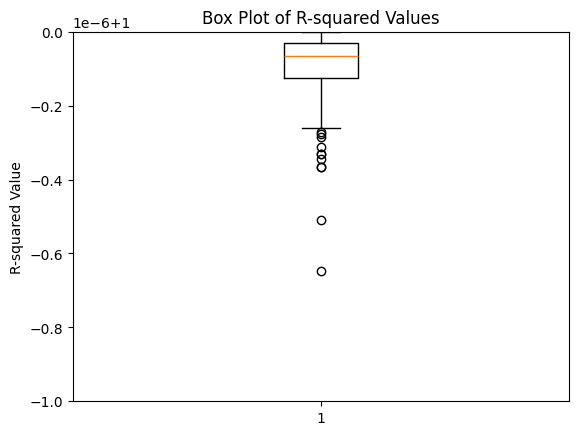

In [27]:
print('average R-squared =',sum(R_squared_res)/len(R_squared_res))

# Plot R-square values in a boxplot
# Note that the y axis is showing the deviation in 1e-6 from the perfect value of 1 so generally the values are very close to 1
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.boxplot(R_squared_res)
ax.set_title('Box Plot of R-squared Values')
ax.set_ylabel('R-squared Value')
ax.set_ylim(1-1e-6, 1)  # If needed, you can set x-axis limits too
plt.show()


### If you get a problem with regression, uncomment the below code to plot V vs I and check the linearity of the fit manually
# R_test = linregress(data_np[0:ctf[3]-1, 2, 2], data_np[0:ctf[3]-1, 4, 2])   
# plt.plot(data_np[0:ctf[3], 2, 2], data_np[0:ctf[3], 4, 2], 'o', label='original data')
# plt.plot(data_np[0:ctf[3], 2, 2], R_test.intercept + R_test.slope * data_np[0:ctf[3], 2, 2], 'r', label='fitted line')
# plt.legend()
# plt.show()


## Resistivity Configuration Compararison 
Comparing the resistivity in configuration A and B which are inverted versions of one another (e.g. source meter and sense meter swapped positions)
This is a good check for any systematic errors

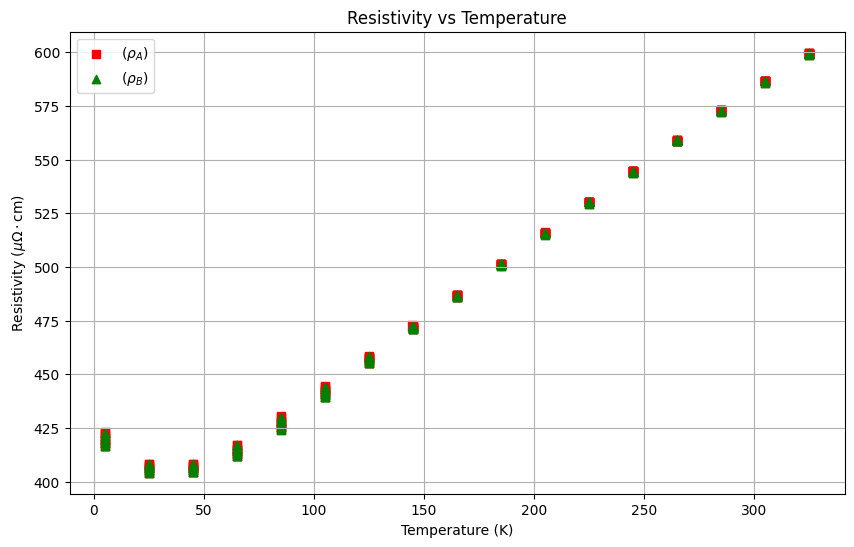

In [28]:
# Create a figure and axis
fig2 = plt.figure(figsize=(10, 6))
ax = fig2.add_subplot(111)  # Create a single subplot


# Plot R_sheet_A vs Temp
ax.scatter(res_data[:,0], res_data[:,2]* 1e8 , marker='s', color='r', label = r'($\rho_A$)')

# Plot R_sheet_B vs Temp
ax.scatter(res_data[:,0], res_data[:,3]* 1e8 , marker='^', color='g', label = r'($\rho_B$)')


# Set labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')
ax.set_title('Resistivity vs Temperature')

# Add a grid
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()

## Resistivity vs Temperature

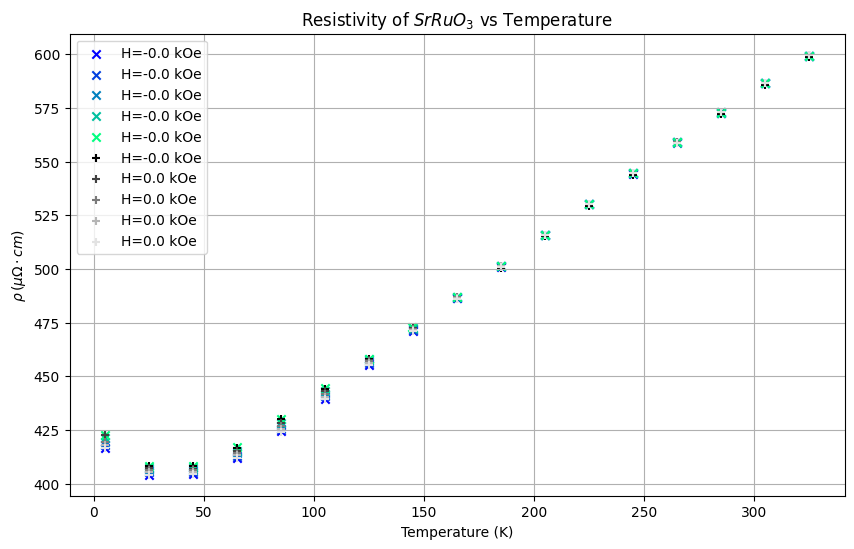

In [29]:
# Create a figure and axis
fig3 = plt.figure(figsize=(10, 6))
ax = fig3.add_subplot(111)  # Create a single subplot

#c_val = plt.cm.jet(np.linspace(0,1,num_field_points))
# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
cmap1 = plt.get_cmap('winter')(np.linspace(0, 1, int(ctf[5] / 2)))
cmap2 = plt.get_cmap('Greys_r')(np.linspace(0, 0.8, int(ctf[5] / 2)))
c_val = np.vstack((cmap1, cmap2))

# Create separate marker arrays for positive and negative fields stiched together
markers = ['x'] * int(ctf[5] / 2) + ['+'] * int(ctf[5] / 2)


for k in range(ctf[5]):
    # Plot rho_film vs Temp
    ax.scatter(res_data[k::ctf[5],0], res_data[k::ctf[5],4] * 1e8, marker=markers[k], color=c_val[k], label = f'H={np.round(res_data[k,1]/1000,decimals=0)} kOe')

# Set labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\rho\,(\mu \Omega \cdot cm)$')
ax.set_title(r'Resistivity of $SrRuO_3$ vs Temperature')
# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()

if plot_data == True:
    fig3.savefig(Path(path_out).joinpath('rho_xx_vs_temperature.png'), dpi=300, bbox_inches='tight')  


## Magnetoresistance vs H
- Plotting the magnetoresistance vs the Applied field strength (H) for several temperatures

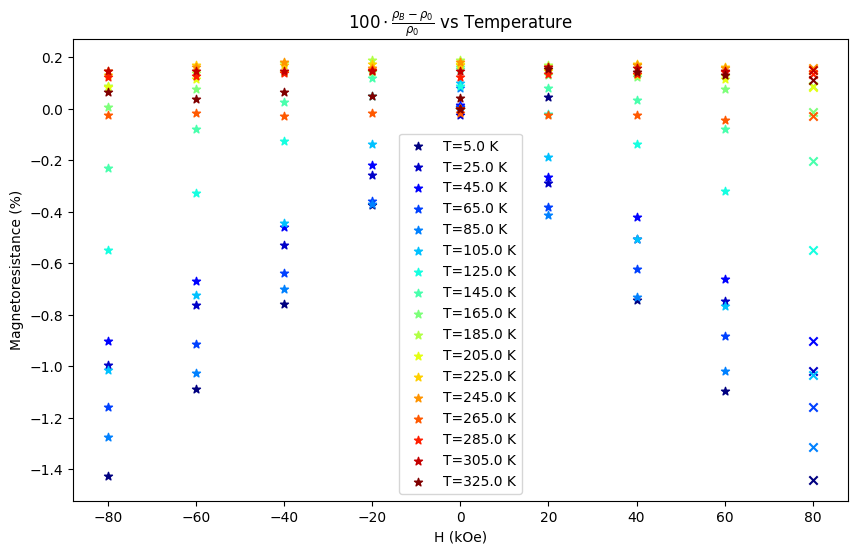

In [30]:

# Calculate the magnetoresistance at each temperature and field strength
# mag_res(temperature, field, index) where: index 0 = VDP config A, index 1 = VDP config B, index 2 = average of A and B
mag_res = functions.magnetoresistance(data_np, film_thickness, ctf, tf_av)

fig4 = plt.figure(figsize=(10, 6))
ax = fig4.add_subplot(111)  # Create a single subplot

# Create a color map for the tempearature points
c_val = plt.cm.jet(np.linspace(0,1,ctf[4]))
# Create a marker array for the temperature points
markers = markers = ['+','.','*', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', 'h', 'H', 'x', 'D', 'd', '|', '_']


for t_count, t in enumerate(ctf[1], start=0):  
    # Add a plot of magnetoresistance vs field strength for each loop of temperature (excluding last field point which is repeat of B=0)
    ax.scatter(ctf[2][:-1]*10, mag_res[t_count,:-1,2], marker='*', color=c_val[t_count], label = f'T={t} K')
    #plot repeat point of B=0 with an x marker to show the difference between two B=0 points
    ax.scatter(ctf[2][-1]*10, mag_res[t_count,-1,2], marker='x', color=c_val[t_count])
        

ax.set_xlabel('H (kOe)')
ax.set_ylabel(r'Magnetoresistance (%)')
ax.set_title(r'$100 \cdot \frac{\rho_{B} - \rho_{0}}{\rho_{0}}$ vs Temperature')
ax.legend()
plt.show()

if plot_data == True:
    fig4.savefig(Path(path_out).joinpath('magnetoresistance_vs_field.png'), dpi=300, bbox_inches='tight')

## Magnetoresistance Vs T
- Now looking at how the Magnetoresitance at a set field strength varies over temperature
- Displaying this for VDP configuration A, VDP configuration B and the average of the two

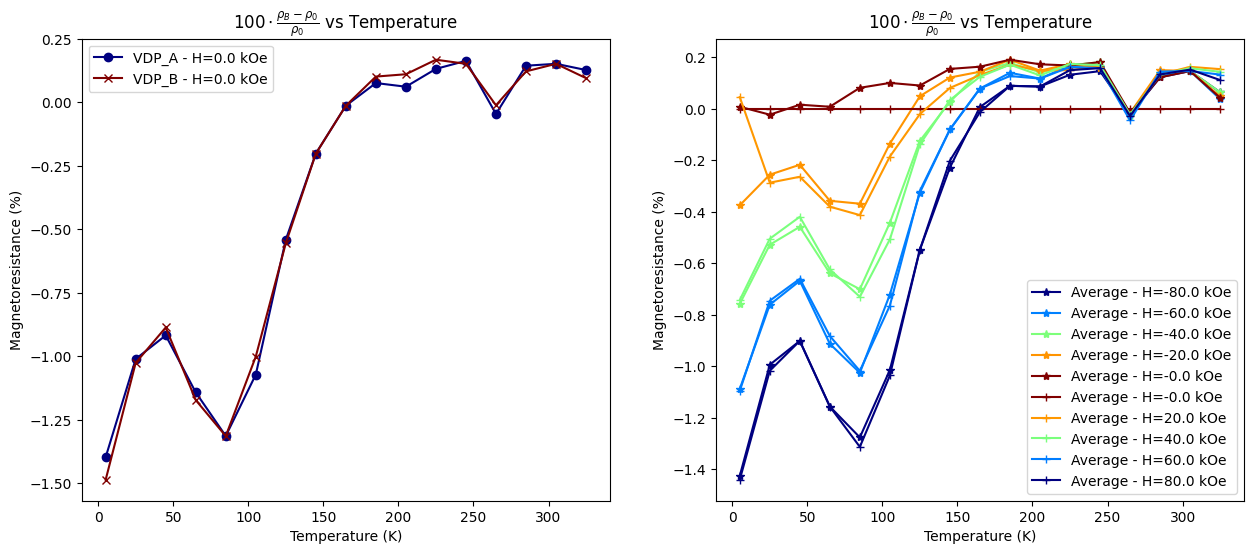

In [31]:
# Calculate the magnetoresistance at each temperature and field strength
# mag_res(temperature, field, index) where: index 0 = VDP config A, index 1 = VDP config B, index 2 = average of A and B
mag_res = functions.magnetoresistance(data_np, film_thickness, ctf, tf_av)

fig5 = plt.figure(figsize=(15, 6))
ax = fig5.add_subplot(121)  # Create two subplot
ax2 = fig5.add_subplot(122)  


# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
cmap1 = plt.get_cmap('jet')(np.linspace(0, 1, int(ctf[5] / 2)))
cmap2 = plt.get_cmap('jet_r')(np.linspace(0, 1, int(ctf[5] / 2)))
c_val = np.vstack((cmap1, cmap2))

# Create separate marker arrays for positive and negative fields stiched together
markers = ['*'] * int(ctf[5] / 2) + ['+'] * int(ctf[5] / 2)

# Find the index of the maximum positive field strength
f_index = int(ctf[5])-1#int(ctf[5]/2 - 1)

# Sub_plot 1: Comparing configurations A and B
ax.plot(ctf[1], mag_res[:,f_index,0], marker='o', color=c_val[0], label = f'VDP_A - H={np.round(ctf[2][f_index]/1000,0)} kOe')
ax.plot(ctf[1], mag_res[:,f_index,1], marker='x', color=c_val[int(len(c_val)/2)], label = f'VDP_B - H={np.round(ctf[2][f_index]/1000,0)} kOe')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'Magnetoresistance (%)')
ax.set_title(r'$100 \cdot \frac{\rho_{B} - \rho_{0}}{\rho_{0}}$ vs Temperature')
ax.legend()

# Sub_plot 2: Comparing the average magnetoresistance vs T for various field strengths 

for H_count, H in enumerate(ctf[2], start=0):
    ax2.plot(ctf[1], mag_res[:,H_count,2], marker=markers[H_count], color=c_val[H_count], label = f'Average - H={np.round(ctf[2][H_count]*10,0)} kOe')     

ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel(r'Magnetoresistance (%)')
ax2.set_title(r'$100 \cdot \frac{\rho_{B} - \rho_{0}}{\rho_{0}}$ vs Temperature')
ax2.legend()

plt.show()

if plot_data == True:
    fig5.savefig(Path(path_out).joinpath('magnetoresistance_vs_temperature.png'), dpi=300, bbox_inches='tight')

## Arhenius Plot

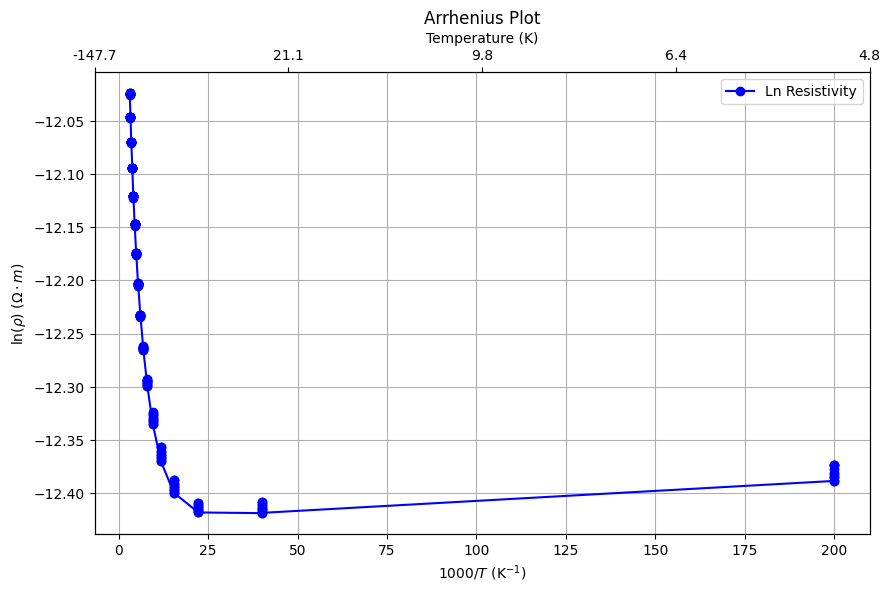

In [32]:
# Create a figure and axis
fig6 = plt.figure(figsize=(10, 6))
ax = fig6.add_subplot(111)  # Create a single subplot

# Plot rho_film vs 1000/Temp
ax.plot(1000 / res_data[:,0], np.log(res_data[:,4]), marker='o', linestyle='-', color='b', label='Ln Resistivity')

# Set labels and title
ax.set_xlabel(r'$1000/T$ (K$^{-1}$)')
ax.set_ylabel(r'$\ln(\rho)$ ($\Omega \cdot m$)')
ax.set_title('Arrhenius Plot')

# Add a grid
ax.grid(True)

# Add a legend
ax.legend()

# Create a secondary x-axis at the top
ax2 = ax.twiny()

# Set the limits of the secondary x-axis to match the primary x-axis
ax2.set_xlim(ax.get_xlim())

# Set the ticks and labels for the secondary x-axis
new_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num=5)
ax2.set_xticks(new_ticks)
ax2.set_xticklabels([f'{1000/tick:.1f}' for tick in new_ticks])
ax2.set_xlabel('Temperature (K)')

# Show the plot
plt.show()

if plot_data == True:
    fig6.savefig(Path(path_out).joinpath('Arrhenius Plot.png'), dpi=300, bbox_inches='tight')

## Calculate the Hall Resistivity ($\rho_{xy}$)
- This is: $\frac{V_{measured-perpendicular}}{I_{source}}*t$


In [33]:
film_thickness = 14e-9 # Film thickness in meters

[hall_data, hall_data_df, hall_coefficient, hall_coefficient_df] = functions.vdp_hall(data_np, film_thickness, ctf, tf_av)
print(hall_data_df.head(30))

    Temp (K)  Field (T)  rho_xy_A(ohm.m)  R_squared(I)_A  rho_xy_B(ohm.m)  \
0     5.0031  -7.999964     1.320028e-08        0.999966     1.320028e-08   
1     4.9985  -6.000035     1.325925e-08        0.999910     1.325925e-08   
2     4.9985  -4.000038     1.322919e-08        0.999925     1.322919e-08   
3     4.9996  -2.000052     1.199059e-08        0.999890     1.199059e-08   
4     4.9996  -0.000027     8.190522e-09        0.999591     8.190522e-09   
5     4.9985  -0.000020     6.913849e-09        0.999391     6.913849e-09   
6     4.9996   1.999979    -2.208672e-08       -0.998659    -2.208672e-08   
7     5.0008   3.999957    -2.854627e-08       -0.999987    -2.854627e-08   
8     4.9985   5.999957    -2.905197e-08       -0.999988    -2.905197e-08   
9     5.0019   7.999977    -2.886590e-08       -0.999978    -2.886590e-08   
10   25.0032  -7.999955     1.259856e-08        0.999966     1.259856e-08   
11   25.0029  -6.000030     1.280129e-08        0.999845     1.280129e-08   

## R-squared Analysis to Check Linearity of Resistivity I-V data

average R-squared_A = 0.9990706486644216
average R-squared_B = 0.9990706486644216


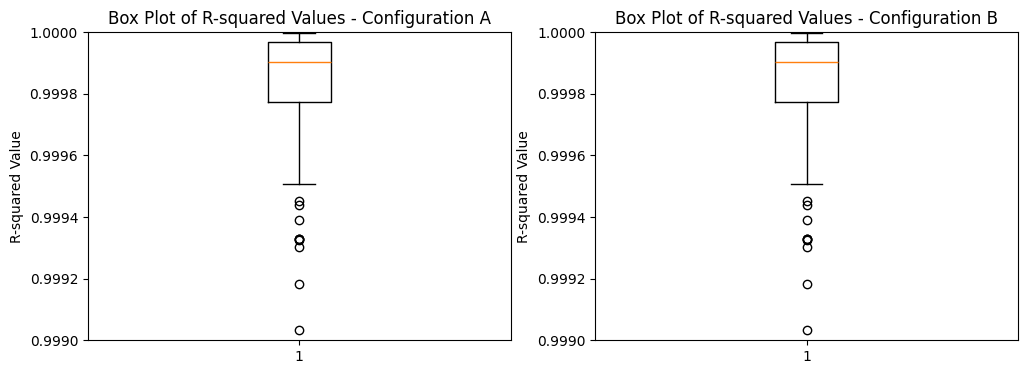

In [34]:
print('average R-squared_A =',np.mean(np.abs(hall_data[:,3])))
print('average R-squared_B =',np.mean(np.abs(hall_data[:,5])))

# Plot R-square values in a boxplot
# Note that the y axis is showing the deviation in 1e-6 from the perfect value of 1 so generally the values are very close to 1
fig7 = plt.figure(figsize=(12, 4))
ax = fig7.add_subplot(121)
ax.boxplot(np.abs(hall_data[:,3]))
ax.set_title('Box Plot of R-squared Values - Configuration A')
ax.set_ylabel('R-squared Value')
ax.set_ylim(1-1e-3, 1)  # If needed, you can set x-axis limits too

ax2 = fig7.add_subplot(122)
ax2.boxplot(np.abs(hall_data[:,5]))
ax2.set_title('Box Plot of R-squared Values - Configuration B')
ax2.set_ylabel('R-squared Value')
ax2.set_ylim(1-1e-3, 1)  # If needed, you can set x-axis limits too
plt.show()


### If you get a problem with regression, uncomment the below code to plot V vs I and check the linearity of the fit manually
# R_test = linregress(data_np[0:ctf[3]-1, 2, 2], data_np[0:ctf[3]-1, 4, 2])   
# plt.plot(data_np[0:ctf[3], 2, 2], data_np[0:ctf[3], 4, 2], 'o', label='original data')
# plt.plot(data_np[0:ctf[3], 2, 2], R_test.intercept + R_test.slope * data_np[0:ctf[3], 2, 2], 'r', label='fitted line')
# plt.legend()
# plt.show()

if plot_data == True:
    fig7.savefig(Path(path_out).joinpath('R_squared_hall_res'), dpi=300, bbox_inches='tight')

## Hall resisitivity vs Temperature

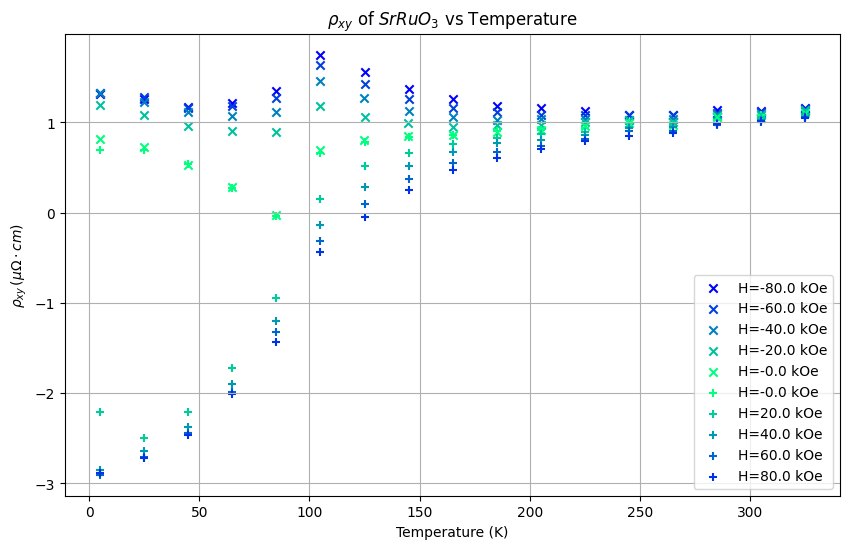

In [35]:
# Create a figure and axis
fig8 = plt.figure(figsize=(10, 6))
ax = fig8.add_subplot(111)  # Create a single subplot

#c_val = plt.cm.jet(np.linspace(0,1,num_field_points))
# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
cmap1 = plt.get_cmap('winter')(np.linspace(0, 1, int(ctf[5] / 2)))
cmap2 = plt.get_cmap('winter_r')(np.linspace(0, 0.8, int(ctf[5] / 2)))
c_val = np.vstack((cmap1, cmap2))

# Create separate marker arrays for positive and negative fields stiched together
markers = ['x'] * int(ctf[5] / 2) + ['+'] * int(ctf[5] / 2)


for k in range(ctf[5]):
    # Plot rho_film vs Temp
    ax.scatter(hall_data[k::ctf[5],0], hall_data[k::ctf[5],6]*1e8 , marker=markers[k], color=c_val[k], label = f'H={np.round(hall_data[k,1]*10,decimals=0)} kOe')

# Set labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$ of $SrRuO_3$ vs Temperature')
# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()

if plot_data == True:
    fig8.savefig(Path(path_out).joinpath('rho_xy_vs_T.png'), dpi=300, bbox_inches='tight')

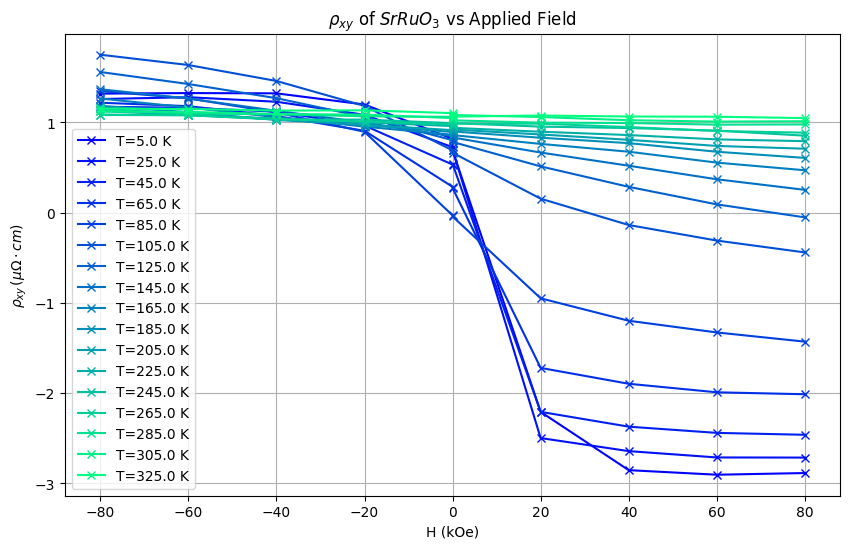

In [44]:
#ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]

# Create a figure and axis
fig9 = plt.figure(figsize=(10, 6))
ax = fig9.add_subplot(111)  # Create a single subplot

#c_val = plt.cm.jet(np.linspace(0,1,num_field_points))
# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
c_val = plt.get_cmap('winter')(np.linspace(0, 1, ctf[4]))


# Create separate marker arrays for positive and negative fields stiched together
markers = ['x'] * ctf[4]


for t_count, t in enumerate(ctf[1], start=0):
    if t > 1:
        index = t_count * ctf[5]
        # Plot rho_film vs Temp
        ax.plot(hall_data[index:index+ctf[5],1]*10, hall_data[index:index+ctf[5],6]*1e8, marker=markers[t_count], color=c_val[t_count], label = f'T={np.round(t,decimals=0)} K')
# Set labels and title
ax.set_xlabel('H (kOe)')
ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$ of $SrRuO_3$ vs Applied Field')
# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()

if plot_data == True:
    fig9.savefig(Path(path_out).joinpath('rho_xy_vs_field.png'), dpi=300, bbox_inches='tight')

## Hall Coeff Vs T?

In [37]:
print(hall_coefficient_df.head(30))

    Temp (K)      Hallco_A  R^2(H)_A      Hallco_B  R^2(H)_B  Hallco_average
0     5.0019 -3.440231e-09 -0.889592 -3.440231e-09 -0.889592   -3.440231e-09
1    24.9949 -3.267670e-09 -0.880533 -3.267670e-09 -0.880533   -3.267670e-09
2    44.9993 -2.959787e-09 -0.891883 -2.959787e-09 -0.891883   -2.959787e-09
3    64.9960 -2.584372e-09 -0.921690 -2.584372e-09 -0.921690   -2.584372e-09
4    85.0009 -2.113455e-09 -0.961492 -2.113455e-09 -0.961492   -2.113455e-09
5   105.0051 -1.568956e-09 -0.984128 -1.568956e-09 -0.984128   -1.568956e-09
6   125.0002 -1.080107e-09 -0.995769 -1.080107e-09 -0.995769   -1.080107e-09
7   144.9993 -7.244418e-10 -0.998495 -7.244418e-10 -0.998495   -7.244418e-10
8   164.9996 -4.975053e-10 -0.999668 -4.975053e-10 -0.999668   -4.975053e-10
9   184.9964 -3.567600e-10 -0.999088 -3.567600e-10 -0.999088   -3.567600e-10
10  205.0010 -2.833605e-10 -0.998725 -2.833605e-10 -0.998725   -2.833605e-10
11  224.9976 -2.182072e-10 -0.996953 -2.182072e-10 -0.996953   -2.182072e-10

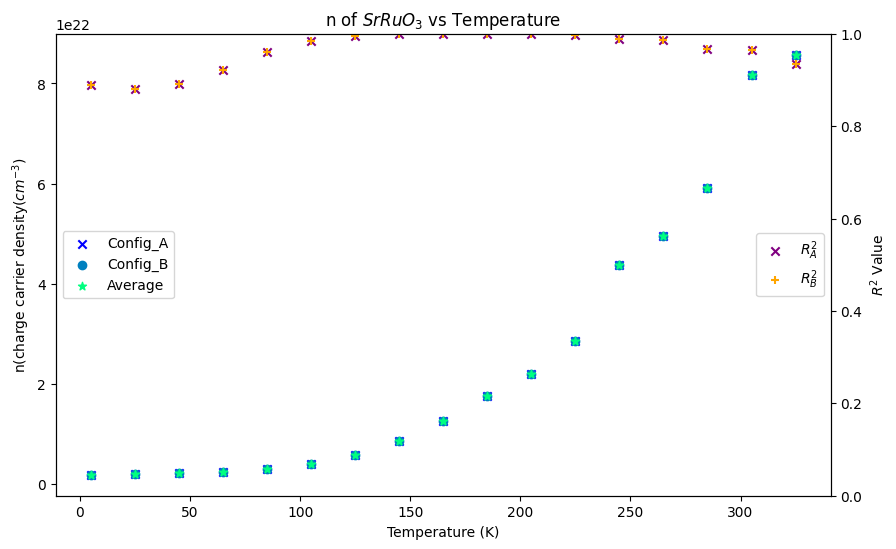

In [38]:


# Create a figure and axis
fig10 = plt.figure(figsize=(10, 6))
ax = fig10.add_subplot(111)  # Create a single subplot

# Generate color map
c_val = plt.get_cmap('winter')(np.linspace(0, 1, 3))

# Create separate marker arrays for positive and negative fields stitched together
markers = ['x','o','*']


ax.scatter(hall_coefficient[:, 0], 1e-6*np.divide(-1,np.multiply(hall_coefficient[:, 1],scipy.constants.e)), marker=markers[0], color=c_val[0], label=f'Config_A')
ax.scatter(hall_coefficient[:, 0], 1e-6*np.divide(-1,np.multiply(hall_coefficient[:, 3],scipy.constants.e)), marker=markers[1], color=c_val[1], label=f'Config_B')
ax.scatter(hall_coefficient[:, 0], 1e-6*np.divide(-1,np.multiply(hall_coefficient[:, 5],scipy.constants.e)), marker=markers[2], color=c_val[2], label=f'Average')

# Set labels and title for the left y-axis
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'n(charge carrier density($cm^{-3}$)')
ax.set_title(r'n of $SrRuO_3$ vs Temperature')

# Add a grid
ax.grid(False)

# Add a legend for the left y-axis
ax.legend(loc='center left')

# Create a second y-axis on the right
ax2 = ax.twinx()

# Plot data on the right y-axis
ax2.scatter(hall_coefficient[:, 0], np.abs(hall_coefficient[:, 2]), color='purple', marker = 'x', label='$R^2_{A}$')
ax2.scatter(hall_coefficient[:, 0], np.abs(hall_coefficient[:, 4]), color='orange', marker = '+', label='$R^2_{B}$')

# Set labels for the right y-axis
ax2.set_ylabel('$R^2$ Value')

# Add a legend for the right y-axis
ax2.legend(loc='center right')
ax2.set_ylim(0, 1)

# Show the plot
plt.show()

if plot_data == True:
    fig10.savefig(Path(path_out).joinpath('n_vs_temperature.png'), dpi=300, bbox_inches='tight')


## Mobility vs T

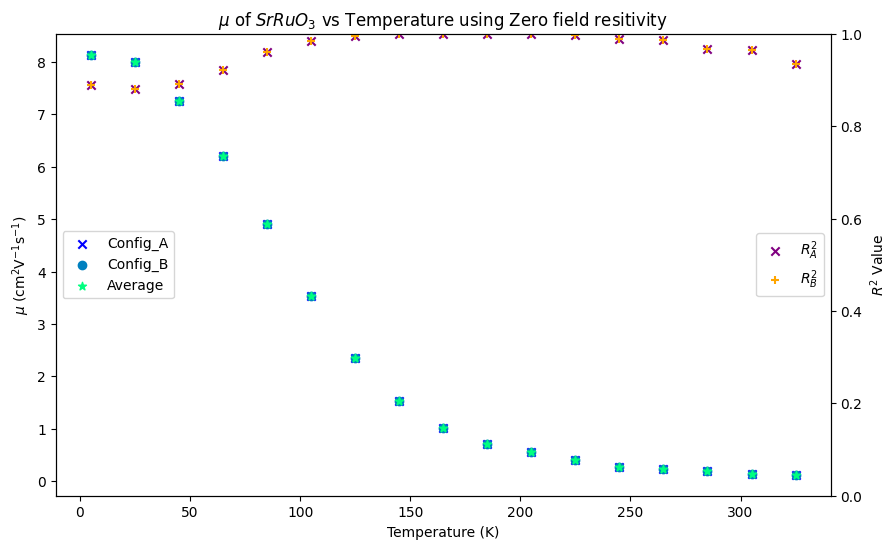

In [39]:


# Create a figure and axis
fig11 = plt.figure(figsize=(10, 6))
ax = fig11.add_subplot(111)  # Create a single subplot

# Generate color map
c_val = plt.get_cmap('winter')(np.linspace(0, 1, 3))

# Create separate marker arrays for positive and negative fields stitched together
markers = ['x','o','*']


ax.scatter(hall_coefficient[:, 0], 1e4*np.divide(-hall_coefficient[:, 1],res_data[int(ctf[5]/2-1)::ctf[5],4]), marker=markers[0], color=c_val[0], label=f'Config_A')
ax.scatter(hall_coefficient[:, 0], 1e4*np.divide(-hall_coefficient[:, 3],res_data[int(ctf[5]/2-1)::ctf[5],4]), marker=markers[1], color=c_val[1], label=f'Config_B')
ax.scatter(hall_coefficient[:, 0], 1e4*np.divide(-hall_coefficient[:, 5],res_data[int(ctf[5]/2-1)::ctf[5],4]), marker=markers[2], color=c_val[2], label=f'Average')

# Set labels and title for the left y-axis
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\mu$ (cm$^2$V$^{-1}$s$^{-1}$)')
ax.set_title(r'$\mu$ of $SrRuO_3$ vs Temperature using Zero field resitivity')

# Add a grid
ax.grid(False)

# Add a legend for the left y-axis
ax.legend(loc='center left')

# Create a second y-axis on the right
ax2 = ax.twinx()

# Plot data on the right y-axis
ax2.scatter(hall_coefficient[:, 0], np.abs(hall_coefficient[:, 2]), color='purple', marker = 'x', label='$R^2_{A}$')
ax2.scatter(hall_coefficient[:, 0], np.abs(hall_coefficient[:, 4]), color='orange', marker = '+', label='$R^2_{B}$')

# Set labels for the right y-axis
ax2.set_ylabel('$R^2$ Value')

# Add a legend for the right y-axis
ax2.legend(loc='center right')
ax2.set_ylim(0, 1)

# Show the plot
plt.show()

if plot_data == True:
    fig11.savefig(Path(path_out).joinpath('mobility_vs_temperature.png'), dpi=300, bbox_inches='tight')


## $\rho_{xy}$ vs $\rho_{xx}$
- Can have problems where with both holes and electrons the carriers can cancel out the measured hall voltage
- Need to check this?

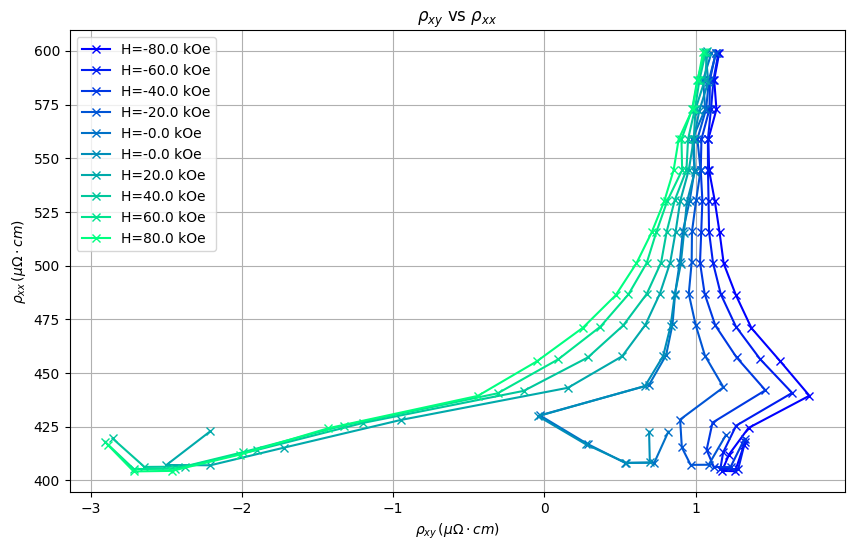

In [40]:
#ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]

# Create a figure and axis
fig12 = plt.figure(figsize=(10, 6))
ax = fig12.add_subplot(111)  # Create a single subplot


# Generate color map
c_val = plt.get_cmap('winter')(np.linspace(0, 1, ctf[5]))

# Create separate marker arrays for positive and negative fields stiched together
markers = ['x'] * ctf[5]


for H_count, H in enumerate(ctf[2], start=0):
    index = t_count * ctf[5]
    # Plot rho_film vs Temp
    ax.plot(hall_data[H_count::ctf[5],4]*1e8, res_data[H_count::ctf[5],4]*1e8, marker=markers[H_count], color=c_val[H_count], label = f'H={np.round(H*10,decimals=0)} kOe')
            #ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]


ax.set_xlabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_ylabel(r'$\rho_{xx}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$ vs $\rho_{xx}$')
# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()


fig11.savefig(Path(path_out).joinpath('rho_xy_vs_rho_xx.png'), dpi=300, bbox_inches='tight')

In [41]:
print(res_data_df.head(30))

    Temp (K)  Field (T)  rho_xx_A (ohm.m)  rho_xx_B(ohm.m)  \
0     5.0031  -7.999964          0.000004         0.000004   
1     4.9985  -6.000035          0.000004         0.000004   
2     4.9985  -4.000038          0.000004         0.000004   
3     4.9996  -2.000052          0.000004         0.000004   
4     4.9996  -0.000027          0.000004         0.000004   
5     4.9985  -0.000020          0.000004         0.000004   
6     4.9996   1.999979          0.000004         0.000004   
7     5.0008   3.999957          0.000004         0.000004   
8     4.9985   5.999957          0.000004         0.000004   
9     5.0019   7.999977          0.000004         0.000004   
10   25.0032  -7.999955          0.000004         0.000004   
11   25.0029  -6.000030          0.000004         0.000004   
12   25.0032  -4.000053          0.000004         0.000004   
13   24.9951  -2.000022          0.000004         0.000004   
14   24.9951  -0.000031          0.000004         0.000004   
15   25.

In [42]:
print(hall_data_df.head(30))

    Temp (K)  Field (T)  rho_xy_A(ohm.m)  R_squared(I)_A  rho_xy_B(ohm.m)  \
0     5.0031  -7.999964     1.320028e-08        0.999966     1.320028e-08   
1     4.9985  -6.000035     1.325925e-08        0.999910     1.325925e-08   
2     4.9985  -4.000038     1.322919e-08        0.999925     1.322919e-08   
3     4.9996  -2.000052     1.199059e-08        0.999890     1.199059e-08   
4     4.9996  -0.000027     8.190522e-09        0.999591     8.190522e-09   
5     4.9985  -0.000020     6.913849e-09        0.999391     6.913849e-09   
6     4.9996   1.999979    -2.208672e-08       -0.998659    -2.208672e-08   
7     5.0008   3.999957    -2.854627e-08       -0.999987    -2.854627e-08   
8     4.9985   5.999957    -2.905197e-08       -0.999988    -2.905197e-08   
9     5.0019   7.999977    -2.886590e-08       -0.999978    -2.886590e-08   
10   25.0032  -7.999955     1.259856e-08        0.999966     1.259856e-08   
11   25.0029  -6.000030     1.280129e-08        0.999845     1.280129e-08   